## Linearna regresija

In [731]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import read_csv

df = pd.read_csv('/Users/gorazdfilipovski/PycharmProjects/VNP/data/aud_data/aud_4_and_5/Salary_dataset.csv')

In [732]:
df.head(5)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [733]:
data_copy_w_unnamed = df.copy()
df.drop(['Unnamed: 0'],axis=1,inplace=True)

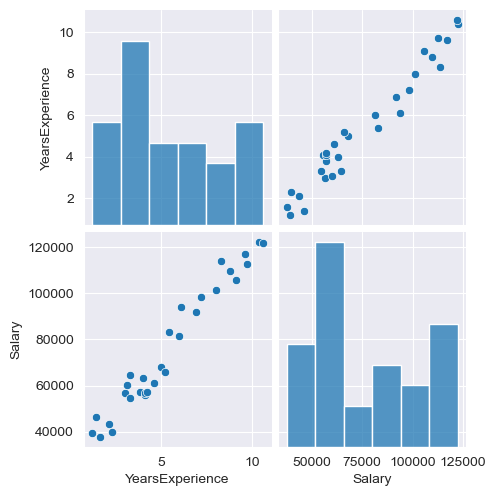

In [734]:
sns.pairplot(df)

In [735]:
X = df["YearsExperience"].values.reshape(-1,1)
Y = df["Salary"]

In [736]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [737]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)

In [738]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [739]:
model.coef_

array([9821.48256635])

In [740]:
model.intercept_

22216.28629658385

In [741]:
Y_pred = model.predict(X_test)

array([[<Axes: title={'center': 'YearsExperience'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

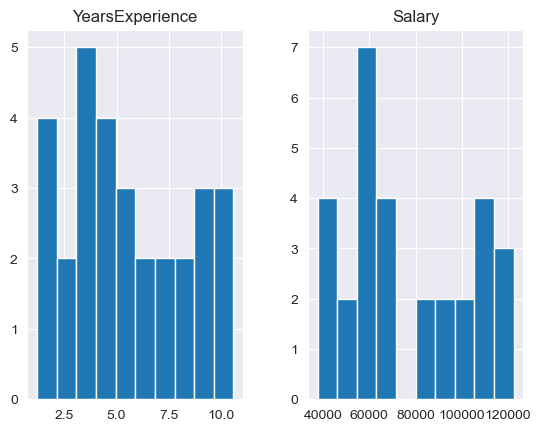

In [742]:
df.hist()

In [743]:
print(r2_score(Y_test,Y_pred))
print(mean_absolute_error(Y_test,Y_pred))

0.9177154006159676
6859.564946828537


## DATASET 2

In [744]:
df = pd.read_csv('/Users/gorazdfilipovski/PycharmProjects/VNP/data/aud_data/aud_4_and_5/avg-household-size.csv')

In [745]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   statefips         3220 non-null   int64  
 1   countyfips        3220 non-null   int64  
 2   avghouseholdsize  3220 non-null   float64
 3   geography         3220 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 100.8+ KB


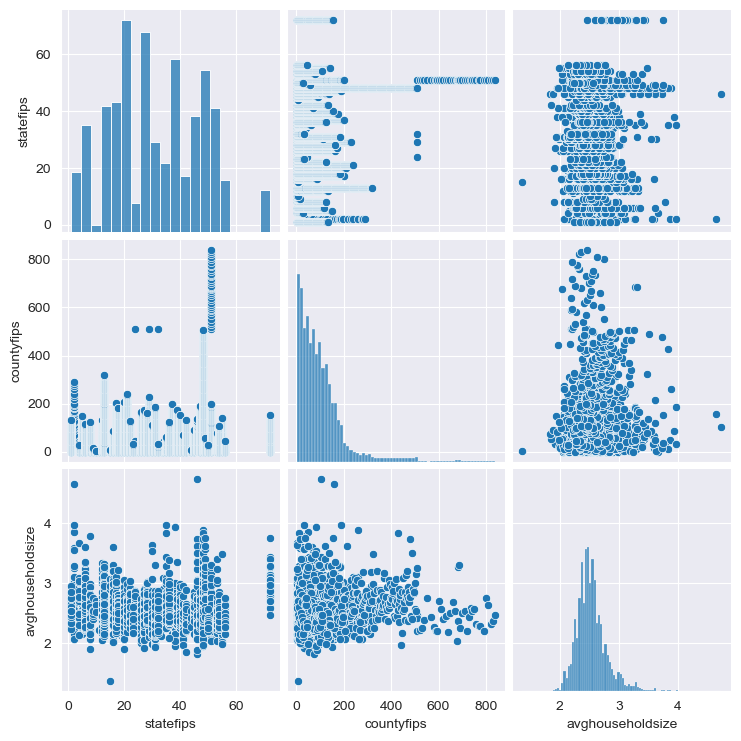

In [746]:
sns.pairplot(df)

In [747]:
from sklearn.preprocessing import LabelEncoder

In [748]:
df.isna().sum()

statefips           0
countyfips          0
avghouseholdsize    0
geography           0
dtype: int64

In [749]:
encoder = LabelEncoder()
df['geography'] = encoder.fit_transform(df['geography'])
df

,statefips,countyfips,avghouseholdsize,geography
0,2,13,2.43,37
1,2,16,3.59,38
2,2,20,2.77,63
3,2,50,3.86,210
4,2,60,2.50,282
...,...,...,...,...
3215,56,37,2.64,2813
3216,56,39,2.63,2849
3217,56,41,2.76,2916
3218,56,43,2.34,3023


In [750]:
len(encoder.classes_)

3220

In [751]:
df["avghouseholdsize"].unique().size

175

In [752]:
X= df.drop(['avghouseholdsize'],axis=1)
Y = df["avghouseholdsize"]

In [753]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

In [754]:
model = LinearRegression()
model.fit(X_train,Y_train)


LinearRegression()

In [755]:
model.coef_

array([ 1.13522179e-03,  1.93912649e-04, -5.62720301e-06])

In [756]:
model.intercept_

2.496463290106362

In [757]:
Y_pred = model.predict(X_test)
mean_absolute_error(Y_test,Y_pred)

0.18207097150923496

In [758]:
r2_score(Y_test,Y_pred)

-0.0011964434606057672

## Logisticka regresija

In [759]:
df = pd.read_csv('/Users/gorazdfilipovski/PycharmProjects/VNP/data/aud_data/aud_4_and_5/abalone.csv')

In [760]:
df.sample(5)

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
881,M,0.655,0.520,0.165,1.4095,0.5860,0.2910,0.4050,9
286,M,0.530,0.435,0.155,0.6990,0.2880,0.1595,0.2050,10
3488,I,0.520,0.380,0.130,0.5345,0.2375,0.1220,0.1535,8
354,M,0.635,0.515,0.170,1.2750,0.5090,0.2860,0.3400,16
2274,M,0.695,0.570,0.200,2.0330,0.7510,0.4255,0.6850,15


In [761]:
df.isnull().sum()

Type             4
LongestShell     0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64

In [762]:
encoder = LabelEncoder()
df["Type"] = encoder.fit_transform(df["Type"])
encoder.classes_

array(['F', 'I', 'M', nan], dtype=object)

In [763]:
df.groupby("Type").size()

Type
0    1304
1    1342
2    1527
3       4
dtype: int64

In [764]:
import numpy as np
df["Type"] = df["Type"].replace(3,np.nan)

In [765]:
df.groupby("Type").size()

Type
0.0    1304
1.0    1342
2.0    1527
dtype: int64

In [766]:
df.isnull().sum()

Type             4
LongestShell     0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64

In [767]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df['Type']  = imputer.fit_transform(df.iloc[:,:1])

In [768]:
df.groupby("Type").size()

Type
0.0    1304
1.0    1342
2.0    1531
dtype: int64

In [769]:
df

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [770]:
X = df.iloc[:,1:]
Y = df["Type"]

In [771]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)


In [772]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
#min max Xnorm = Xi-Xmin/Xmax-Xmin
X_test = scaler.transform(X_test)

In [773]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [774]:
y_pred = model.predict(X_test)

In [775]:
from sklearn.metrics import f1_score,classification_report,accuracy_score
f1_score(Y_test,y_pred,average='micro')


0.5406698564593302

In [776]:
f1_score(Y_test,y_pred,average='macro')


0.5328605200945625

In [777]:
accuracy_score(Y_test,y_pred)


0.5406698564593302

In [778]:
print(classification_report(Y_test,y_pred))


              precision    recall  f1-score   support

         0.0       0.48      0.34      0.40       132
         1.0       0.60      0.82      0.69       119
         2.0       0.52      0.50      0.51       167

    accuracy                           0.54       418
   macro avg       0.53      0.55      0.53       418
weighted avg       0.53      0.54      0.53       418

